In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = 'tight'
import sklearn
sklearn.set_config(print_changed_only=True)
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

### Binary classification

$\mathcal Y=\{-1,1\}$

C:\Users\rokhl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[48  5]
 [ 5 85]]
Accuracy: 0.9300699300699301


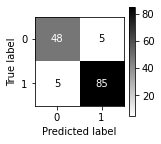

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('Accuracy:',lr.score(X_test, y_test))
fig, ax = plt.subplots(figsize=(2, 2))
plot_confusion_matrix(lr, X_test, y_test, cmap='gray_r', ax=ax)
plt.savefig("images/plot_confusion_matrix.png")

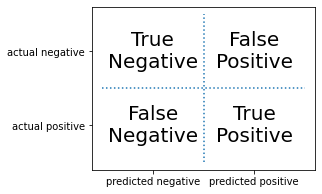

In [3]:
def make_2x2_matrix(labels, fontsize=20):
    plt.figure(figsize=(4, 3))
    plt.vlines([.5], ymin=-.5, ymax=1.5, linestyle=':')
    plt.hlines([.5], xmin=-.5, xmax=1.5, linestyle=':')
    plt.xticks([0, 1], ['predicted negative', 'predicted positive'])
    plt.yticks([1, 0], ['actual negative', 'actual positive'])
    a = plt.text(0, 1, labels[0], horizontalalignment='center', verticalalignment='center', fontsize=fontsize)
    b = plt.text(0, 0, labels[1], horizontalalignment='center', verticalalignment='center', fontsize=fontsize)
    c = plt.text(1, 1, labels[2], horizontalalignment='center', verticalalignment='center', fontsize=fontsize)
    d = plt.text(1, 0, labels[3], horizontalalignment='center', verticalalignment='center', fontsize=fontsize)
    return a, b, c, d
make_2x2_matrix(['True\nNegative', 'False\nNegative', 'False\nPositive', 'True\nPositive'])
plt.savefig("images/confusion_matrix.png")


Accuracy:

$$ \mathsf P(\hat Y=Y)\approx\frac{TP+TN}{TP+TN+FP+FN} $$

Accuracy is symmetric w.r.t. positive and negative classes.


Accuracy is not the best metrics in the case of imbalance classes

**Example.** `1`: handwritten digit is 5, `-1`: handwritten digit is not 5.

A dummy classifier, which always predicts `not 5` will have about 90% accuracy.

- There can be specific losses for Type I and Type II errors. Type I error: False positive (FP) prediction. Type II error: false negative (FN) predition. 

**Example.** `1`: a person is guilty, `-1`: a person is innocent (not guilty). 

Type I error (False positive): to prison an innocent person

Type II error (False negative): to free a guilty person

*Another example*, showing that accuracy alone cannot say if the predictor is good. 

In [4]:
y_true = np.zeros(100, dtype=int)
y_true[:10] = 1
y_pred_1 = np.zeros(100, dtype=int)
y_pred_2 = y_true.copy()
y_pred_2[10:20] = 1
y_pred_3 = y_true.copy()
y_pred_3[5:15] = 1 - y_pred_3[5:15]

In [5]:
from sklearn.metrics import accuracy_score
for y_pred in [y_pred_1, y_pred_2, y_pred_3]:
    print(accuracy_score(y_true, y_pred))

0.9
0.9
0.9


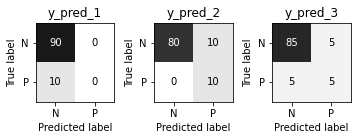

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.colors import Normalize

fig, axes = plt.subplots(1, 3)
for i, (ax, y_pred) in enumerate(zip(axes, [y_pred_1, y_pred_2, y_pred_3])):
    ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=['N', 'P']).plot(ax=ax, cmap='gray_r')
    ax.set_title("y_pred_{}".format(i + 1))
    ax.images[-1].colorbar.remove()
    ax.images[0].set_norm(Normalize(vmin=0, vmax=100))
#plt.tight_layout()
plt.savefig("images/problems_with_accuracy.png")

### Precision, recall, f-score

The accuracy of positive predictions:

$$ \textrm{precision}=\mathsf P(Y=1|\hat Y=1)=\frac{TP}{FP+TP}$$

The ratio of positive instances that are correctly detected by the classifier (**true positive rate (TPR)**, also known as the **sensitivity**, **recall**, **hit rate** or **coverage**):

$$ \textrm{TPR}=\textrm{recall}=\mathsf P(\hat Y=1|Y=1)=\frac{TP}{FN+TP}$$

The harmonic mean of precision and recall ($F_1$-score):
$$ F_1=\frac{2}{\frac{1}{\textrm{precision}}+\frac{1}{\textrm{recall}}}
=\frac{2\cdot \textrm{precision}\cdot \textrm{recall}}{\textrm{precision}+\textrm{recall}} $$

Harmonic mean:

$$H(x_1,x_2)=\frac{2x_1 x_2}{x_1+x_2}$$

$$ \min\{x_1,x_2\}\le H(x_1,x_2)\le 2\min\{x_1,x_2\}.$$

To make the recall high predict all as `positive`. To make the preicsion high predict `positive` only when you are highly certtain (make few accurate positive predictions). 

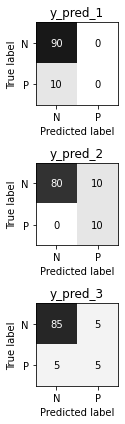

In [7]:
fig, axes = plt.subplots(3, figsize=(3, 6))
for i, (ax, y_pred) in enumerate(zip(axes, [y_pred_1, y_pred_2, y_pred_3])):
    ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=['N', 'P']).plot(ax=ax, cmap='gray_r')
    ax.set_title("y_pred_{}".format(i + 1))
    ax.images[-1].colorbar.remove()
    ax.images[0].set_norm(Normalize(vmin=0, vmax=100))
plt.tight_layout()
plt.savefig("images/confusion_matrix_col.png")

In [8]:
from sklearn.metrics import classification_report
for y_pred in [y_pred_1, y_pred_2, y_pred_3]:
    print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        90
           1       0.00      0.00      0.00        10

    accuracy                           0.90       100
   macro avg       0.45      0.50      0.47       100
weighted avg       0.81      0.90      0.85       100

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        90
           1       0.50      1.00      0.67        10

    accuracy                           0.90       100
   macro avg       0.75      0.94      0.80       100
weighted avg       0.95      0.90      0.91       100

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        90
           1       0.50      0.50      0.50        10

    accuracy                           0.90       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.90      0.90      0.90       100



C:\Users\rokhl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rokhl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rokhl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here row `0` means: `0` is the positive class, row `1` means: `1` is the positive class.

$$ \textrm{macro}=\frac{1}{|K|}\sum_{k\in K} R(y_k,\hat y_k) $$

$$ \textrm{weighted}=\frac{1}{n}\sum_{k\in K} n_k R(y_k,\hat y_k) $$

$K$ is the set of classes ($|K|=2$ for binary classification). 

$R(y_k,\hat y_k)$ is the precision, recall, or $f_1$-score when the class $k$ is assumed to be positive.

In [9]:
from sklearn.metrics import precision_score, recall_score
print(recall_score(y_true, y_pred_1, average='weighted'))
print(recall_score(y_true, y_pred_1, average='macro'))

0.9
0.5


Macro average recall: 0.5 for constant predictor, 0.5 for random predictor (if $|K|=2$). It is the same as balanced accuracy:

$$ \mathrm{balanced\ accuracy}=\frac{1}{2}\left(\frac{TP}{FN+TP}+\frac{TN}{TN+FP}\right)$$

In [10]:
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_true, y_pred_1))

0.5


#### Real imbalanced dataset

In [11]:
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.metrics import precision_recall_curve
data = fetch_openml('mammography', as_frame=True)
X, y = data.data, data.target
X.shape

(11183, 6)

In [12]:
y.value_counts()

-1    10923
1       260
Name: class, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target == '1', random_state=0)

In [14]:
svc=make_pipeline(StandardScaler(),SVC(C=100,gamma=0.1))
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9864091559370529

In [15]:
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2732
        True       0.81      0.53      0.64        64

    accuracy                           0.99      2796
   macro avg       0.90      0.76      0.82      2796
weighted avg       0.98      0.99      0.99      2796



In [16]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9881974248927039

In [17]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2732
        True       0.92      0.53      0.67        64

    accuracy                           0.99      2796
   macro avg       0.95      0.77      0.83      2796
weighted avg       0.99      0.99      0.99      2796



**Goal setting.** Example: detect fraudulent transactions with high recall, the preicison is not so important. 

Changing thresholds.

In [18]:
y_pred=rf.predict_proba(X_test)[:,1]>0.3
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      2732
        True       0.75      0.66      0.70        64

    accuracy                           0.99      2796
   macro avg       0.87      0.83      0.85      2796
weighted avg       0.99      0.99      0.99      2796



Recall increased (`True` is the positive class).

**Precision-Recall curve** looks at all possible thresholds. 

For support vector machines (SVC):
$$ h_{w,b,\theta}(x)=\begin{cases}
1,& \langle w,x\rangle + b\ge \theta\\
-1,&\ \textrm{otherwise}
\end{cases}$$
where $\theta=0$ is the default value. Decsion function: $\langle w,x\rangle + b$.

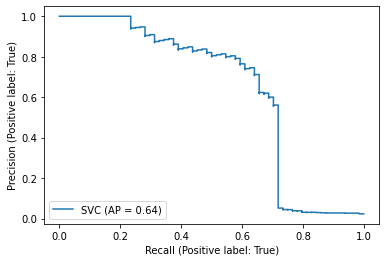

In [19]:
from sklearn.metrics import plot_precision_recall_curve, precision_recall_fscore_support
plot_precision_recall_curve(svc, X_test, y_test, name='SVC')

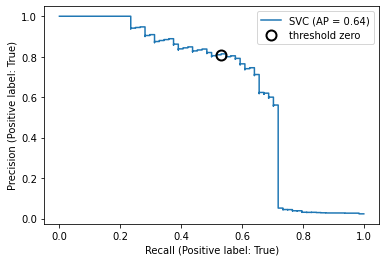

In [20]:
pr_svc = plot_precision_recall_curve(svc, X_test, y_test, name='SVC')
# also compute the precision/recall trade-off from predict
p_svc, r_svc, _, _ = precision_recall_fscore_support(svc.predict(X_test), y_test, average='binary')
plt.plot(p_svc, r_svc, 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend()
plt.savefig("images/precision_recall_curve.png")

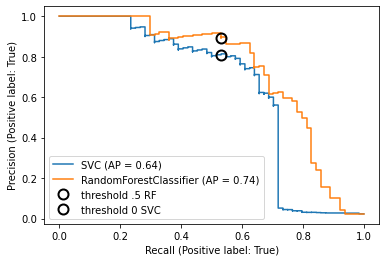

In [21]:
rf = RandomForestClassifier(random_state=0, max_features=2)
rf.fit(X_train, y_train)

pr_svc.plot(name='SVC')
pr_rf = plot_precision_recall_curve(rf, X_test, y_test, ax=plt.gca())

p_rf, r_rf, _, _ = precision_recall_fscore_support(rf.predict(X_test), y_test, average='binary')
plt.plot(p_rf, r_rf, 'o', markersize=10, label="threshold .5 RF", fillstyle="none", c='k', mew=2)
plt.plot(p_svc, r_svc, 'o', markersize=10, label="threshold 0 SVC", fillstyle="none", c='k', mew=2)
plt.legend()
plt.savefig("images/rf_vs_svc.png")

**ROC curve** plots the *true positive rate* (another name for recall) against the **false positive rate (FPR)**, also called the **false alarm rate**, or the **type I error rate**,

$$ \textrm{FPR}=\mathsf P(\hat Y=1|Y=-1)=\frac{FP}{TN+FP}$$

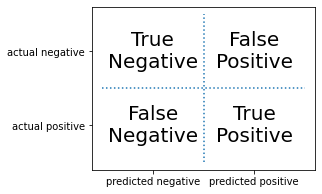

In [22]:
make_2x2_matrix(['True\nNegative', 'False\nNegative', 'False\nPositive', 'True\nPositive']);

- Large false positive rate: many innocent persons are prisoned

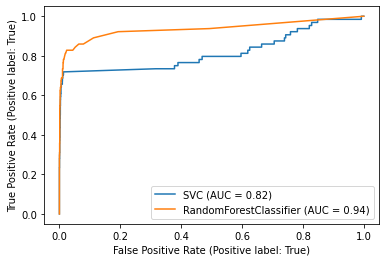

In [23]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc, X_test, y_test, name='SVC')
plot_roc_curve(rf, X_test, y_test, ax=plt.gca())

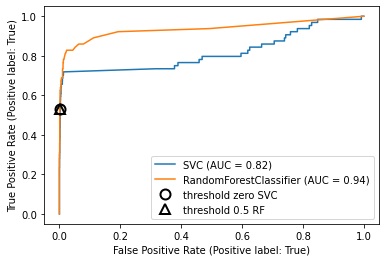

In [24]:
# normalize='true': normalizes confusion matrix over the rows

confusion_svc = confusion_matrix(y_test, svc.predict(X_test), normalize='true')
confusion_rf = confusion_matrix(y_test, rf.predict(X_test), normalize='true')

plot_roc_curve(svc, X_test, y_test, name='SVC')
plot_roc_curve(rf, X_test, y_test, ax=plt.gca())
plt.plot(confusion_svc[0, 1], confusion_svc[1, 1], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
plt.plot(confusion_rf[0, 1], confusion_rf[1, 1], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

Both precision-recall and ROC curves are determined by the family of confusion matrices computed for all thresholds.

In [25]:
from sklearn.metrics import precision_recall_curve
y_scores=svc.decision_function(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

In [26]:
y_scores.shape

(2796,)

In [27]:
thresholds.shape

(1956,)

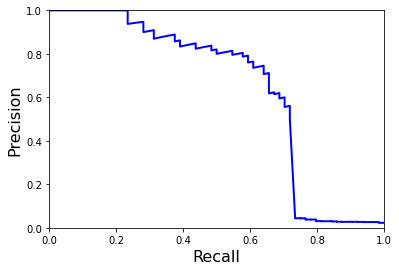

In [28]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(6, 4))
plot_precision_vs_recall(precisions, recalls)

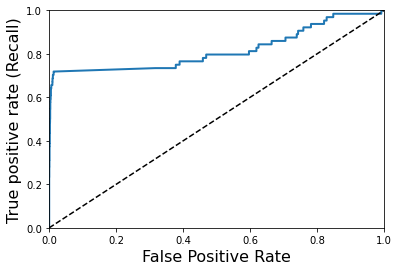

In [29]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True positive rate (Recall)', fontsize=16)

plt.figure(figsize=(6, 4))
plot_roc_curve(fpr, tpr)

*Average precision*

$$ \textrm{AveP}=\sum_{k=1}^n P(k)(R(k)-R(k-1))\approx\int P\, dR$$

area under the precision-recall curve projected to vertical exis ($P$ - precision, $R$ - recall).

*AUC (Area under the curve)*

$$\textrm{AUC}\approx\int \mathrm{FPR}\,d R$$

The precision_recall_curve computes a precision-recall curve from the ground truth label and a score given by the classifier. It does this by varying a decision threshold.

SVC classifier:

In [30]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_scores)

0.6352917371029126

In [31]:
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc(fpr, tpr)

0.8172870150073206

RF classifier:

In [32]:
y_scores=rf.predict_proba(X_test)[:,1]
average_precision_score(y_test, y_scores)

0.7368113212285828

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc(fpr, tpr)

0.9359615208638359

Summary of metrics for binary classification

Threshold-based:
* accuracy
* precision, recall, $f_1$-score
* precision-recall curve, roc curve

Ranking:
* average precision
* auc

## Multi-class classification

In [34]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

digits = load_digits()
 # data is between 0 and 16
X_train, X_test, y_train, y_test = train_test_split(
    digits.data / 16., digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.962
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  1  0  1  1]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  2  0  0 46  0  0]
 [ 0  3  1  0  0  1  0  0 43  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


C:\Users\rokhl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      1.00      0.99        44
           3       1.00      0.96      0.98        45
           4       0.95      0.97      0.96        38
           5       0.96      0.96      0.96        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.96      0.90      0.92        48
           9       0.92      0.98      0.95        47

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [36]:
from sklearn.metrics import precision_score, recall_score
recall_score(y_test, pred, average='macro'), recall_score(y_test, pred, average='weighted')

(0.9631464959245957, 0.9622222222222222)

The `roc_auc_score` function can also be used in multi-class classification. Two averaging strategies are currently supported: the one-vs-one algorithm computes the average of the pairwise ROC AUC scores, and the one-vs-rest algorithm computes the average of the ROC AUC scores for each class against all other classes. In both cases, the predicted labels are provided in an array with values from 0 to `n_classes`, and the scores correspond to the probability estimates that a sample belongs to a particular class. The OvO and OvR algorithms support weighting uniformly (`average='macro'`) and by prevalence (`average='weighted'`).

In [37]:
from sklearn.metrics import roc_auc_score
y_prob = lr.predict_proba(X_test)
y_prob.shape

(450, 10)

*One-vs-one Algorithm*: Computes the average AUC of all possible pairwise combinations of classes. Hand \& Till (2001) defines a multiclass AUC metric weighted uniformly:

$$ \frac{1}{c(c-1)}\sum_{j=1}^c\sum_{k\neq j} AUC(j,k), $$

where $c$ is the number of classes, and $AUC(j,k)$ is the AUC with $j$ class as the positive class and $k$ class as the negative class. This algorithm is used by setting the keyword argument `multiclass` to `'ovo'` and average to `'macro'`.

*One-vs-rest Algorithm*: Computes the AUC of each class against the rest Provost \& Domingos (2000):

$$\frac{1}{c}\sum_{j=1}^c p(j) AUC(j,rest_j)$$

To enable this algorithm set the keyword argument multiclass to `'ovr'`, averaging: `'macro'`.

In [38]:
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")

print("One-vs-One ROC AUC scores:\n{:.6f}".format(macro_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f}".format(macro_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.998975
One-vs-Rest ROC AUC scores:
0.998943


Summary of metrics for binary classification

Threshold-based:
* accuracy
* precision, recall, $f_1$-score (macro average, weighted average)
* precision-recall curve, roc curve

Ranking:
* OVR ROC AUC
* OVO ROC AUC

**Possible strategy**: use ranking metrics in grid search, and find optimal threshold after this.

### Using with cross-validation

In [39]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=(2500, 500), cluster_std=[7.0, 2],
                  random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# default scoring for classification is accuracy
scores_default = cross_val_score(SVC(), X, y)

# providing scoring="accuracy" doesn't change the results
explicit_accuracy =  cross_val_score(SVC(), X, y, scoring="accuracy")

# using ROC AUC
roc_auc =  cross_val_score(SVC(), X, y, scoring="roc_auc")

print("Default scoring: {}".format(scores_default))
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.937 0.907 0.913 0.915 0.913]
Explicit accuracy scoring: [0.937 0.907 0.913 0.915 0.913]
AUC scoring: [0.975 0.957 0.951 0.968 0.961]


In [40]:
from sklearn.model_selection import cross_validate
res=cross_validate(RandomForestClassifier(),X,y,scoring=["accuracy","average_precision","recall_macro"],\
                   return_train_score=True,cv=5)
pd.DataFrame(res)

,fit_time,score_time,test_accuracy,train_accuracy,test_average_precision,train_average_precision,test_recall_macro,train_recall_macro
0,0.173797,0.025333,0.901667,0.999583,0.756733,1.0,0.821,0.99875
1,0.175871,0.024326,0.895000,1.000000,0.700038,1.0,0.845,1.00000
2,0.169801,0.024570,0.896667,1.000000,0.658067,1.0,0.822,1.00000
3,0.183510,0.024276,0.895000,0.999583,0.712067,1.0,0.813,0.99975
4,0.172855,0.024359,0.911667,1.000000,0.775498,1.0,0.855,1.00000


In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.logspace(-3, 2, 6),
              'gamma': np.logspace(-3, 2, 6) / X_train.shape[0]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))
print(len(grid.best_estimator_.support_))

{'C': 1.0, 'gamma': 0.044444444444444446}
0.9173333333333333
455


In [42]:
param_grid = {'C': np.logspace(-3, 2, 6),
              'gamma': np.logspace(-3, 2, 6) / X_train.shape[0]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=10, scoring='average_precision')
grid.fit(X_train, y_train)
print(grid.best_params_)
print((grid.predict(X_test) == y_test).mean())
print(len(grid.best_estimator_.support_))

{'C': 100.0, 'gamma': 0.0044444444444444444}
0.916
443


Metric function interface

In [43]:
svc=SVC().fit(X_train,y_train)
y_scores=svc.decision_function(X_test)
average_precision_score(y_test,y_scores)

0.8267006830840159

In [44]:
y_pred=svc.predict(X_test)
balanced_accuracy_score(y_test,y_pred)

0.8840679494522368

Scorer interface

In [45]:
from sklearn.metrics import get_scorer
ap_scorer=get_scorer('average_precision')
svc=SVC().fit(X_train,y_train)
ap_scorer(svc,X_test,y_test)

0.8267006830840159

In [46]:
ab_scorer=get_scorer('balanced_accuracy')
ab_scorer(svc,X_test,y_test)

0.8840679494522368